In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Forward pass

For demonstration purposes we define a simple network, fix its weights and see what is the result of the forward pass. We'll also implement the forward pass with numpy.

In [2]:
model = keras.Sequential()
model.add(layers.Input(shape=(3,)))
model.add(layers.Dense(1, activation='sigmoid'))

W = model.layers[0].get_weights() # this gives us the weights for layer 0 (ie. the only layer in the network)
print("Initial weights:")
print(W) # the weights are random numbers close to 0.0

# let's set weight values
W[0][0] = 1.
W[0][1] = 2.
W[0][2] = 3.
W[1][0] = -4.9
model.layers[0].set_weights(W)
print("Weights after set_weights():")
print(model.layers[0].get_weights()) # verify that the weights have been set

input_sample = np.array(([2,0,1],), dtype=np.float32) # input sample

print("Result of forward pass:")
# forward propagation with input sample converted to tensorflow tensor (details of tensorflow skipped here)
print(model.call(tf.convert_to_tensor(input_sample)))


Initial weights:
[array([[-0.11926091],
       [-0.748184  ],
       [ 0.5478102 ]], dtype=float32), array([0.], dtype=float32)]
Weights after set_weights():
[array([[1.],
       [2.],
       [3.]], dtype=float32), array([-4.9], dtype=float32)]
Result of forward pass:
tf.Tensor([[0.5249791]], shape=(1, 1), dtype=float32)


In [3]:
# do the same thing with numpy

X = np.column_stack((np.ones((1,)),input_sample))[0]
w = np.column_stack((W[1], W[0].T))[0]

print("Numpy implementation for forward pass")
print("Design matrix X:")
print(X)
print("Weights w:")
print(w)
z = np.dot(w.T,X) # inner product
print("Linear part result:")
print(z)
y = 1 / (1 + np.exp(-z)) # sigmoid function
print("After applying activation function:")
print(y)


Numpy implementation for forward pass
Design matrix X:
[1. 2. 0. 1.]
Weights w:
[-4.9  1.   2.   3. ]
Linear part result:
0.09999990463256836
After applying activation function:
0.5249791636965875


## 1a Fitting a single-neuron model to straight line data

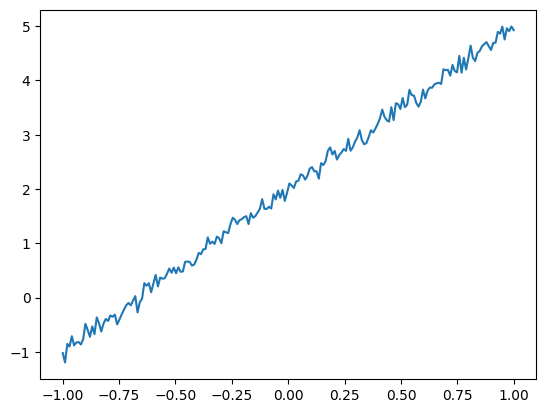

In [4]:
# Create data with some noise. We use data in range -1..1 so don't need to center and scale.

N = 200
x = np.linspace(-1,1,N)
y = 2 + 3 * x + np.random.normal(0,0.1,N)

plt.plot(x,y)
plt.show()

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.4)

### Define, compile and fit model

Model is built as a sequential network (layers follow each other sequentially, no braches etc). Dense means fully connected layer (not illustrative in this example). compile() method allows for specification of the optimizer to use, the loss function, and (optionally) metric to follow during training.

fit() method trains the model for epoch rounds (1 epoch - all training data used once for training). batch_size says how many samples are processed in one forward pass. Optional parameter validation_data can be used to give the validation set to be evaluated during the training loop. fit() returns a history object where for example training and validation metric values are available.

In [5]:
# Create a model with one layer of one artificial neuron and activation function = identity
# This is the same as linear model y = ax + b
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(1,)))
model.add(keras.layers.Dense(1))
model.summary()

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
hist = model.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_val,y_val))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 8.0826 - mse: 8.0826 - val_loss: 6.0807 - val_mse: 6.0807
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3663 - mse: 7.3663 - val_loss: 5.4184 - val_mse: 5.4184
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7665 - mse: 6.7665 - val_loss: 4.8584 - val_mse: 4.8584
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6068 - mse: 5.6068 - val_loss: 4.3506 - val_mse: 4.3506
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4874 - mse: 5.4874 - val_loss: 3.9100 - val_mse: 3.9100
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8283 - mse: 4.8283 - val_loss: 3.5254 - val_mse: 3.5254
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0914 - mse: 4.0914 - val_loss: 3.1873 - val_mse: 3.1873
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.6327 - mse: 3.6327 - val_loss: 2.8853 - val_mse: 2.8853
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4199 - mse: 3.4199 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


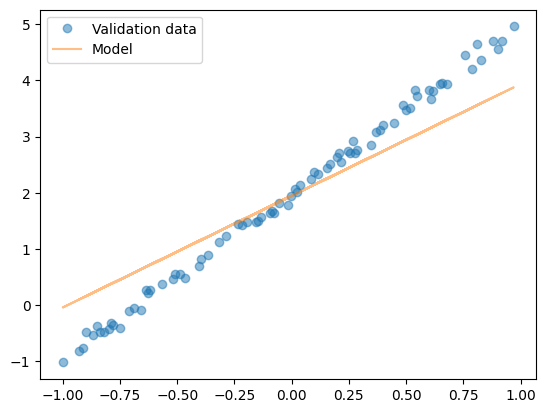

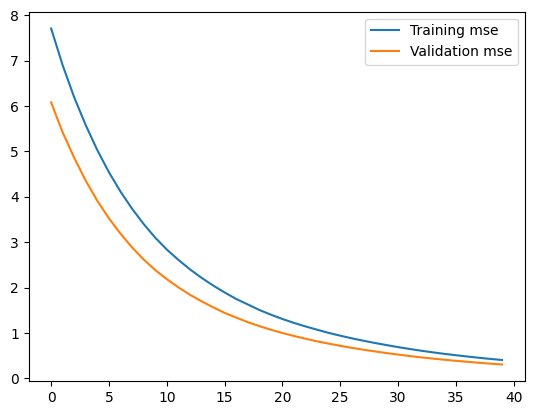

In [6]:
plt.plot(x_val, y_val, 'o', alpha=0.5, label='Validation data')
plt.plot(x_val, model.predict(x_val.reshape(-1,1)), alpha=0.5, label='Model')
plt.legend()
plt.show()

plt.plot(hist.history['mse'], label='Training mse')
plt.plot(hist.history['val_mse'], label='Validation mse')
plt.legend()
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


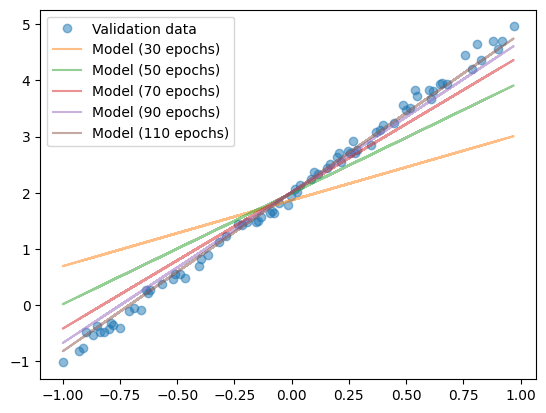

In [7]:
# Let's see how the fit depends on number of epochs. This is for illustration purposes only.

model_inc = keras.models.Sequential()
model_inc.add(keras.layers.Input(shape=(1,)))
model_inc.add(keras.layers.Dense(1))
model_inc.summary()

model_inc.compile(optimizer='sgd', loss='mse', metrics=['mse'])

epoch_step = 20

hist = model_inc.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val,y_val), verbose=0)
total_epochs = 10

plt.plot(x_val, y_val, 'o', alpha=0.5, label='Validation data')

for step in range(5):
    hist = model_inc.fit(x_train, y_train, epochs=epoch_step, batch_size=32, validation_data=(x_val,y_val), verbose=0)
    total_epochs += epoch_step
    plt.plot(x_val, model_inc.predict(x_val.reshape(-1,1)), alpha=0.5, label="Model (%d epochs)"%(total_epochs))

plt.legend()
plt.show()

## Function approximation

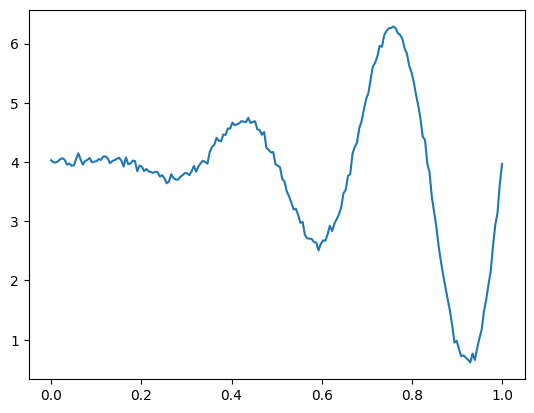

In [8]:
# Create data set

N = 200
x = np.linspace(0,1,N)
y = 4 + 4 * x * x * np.sin(6 * 3.14 * x) + np.random.normal(0,0.05,N)

plt.plot(x,y)
plt.show()

#### Create model

Here we don't have a linear case, so for sure more complicated model is needed. We'll stack multiple wide layers and use nonlinear activation function tanh in the hidden layers. To allow the model to make predictions in a wide range, no activation function is specified for the last layer (if we'd used tanh there, the range of predictions would be restricted to -1..1).

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(1,)))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(1))

model.summary()

model.compile(optimizer='adam', loss='mse')

model.fit(x,y,epochs=400,batch_size=16,verbose=0)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,701 (158.99 KB)

 Trainable params: 40,701 (158.99 KB)

 Non-trainable params: 0 (0.00 B)

#### Compare model predictions with data

The predictions indicate that the model is capable of following the data quite well. The fit could be improved by using more layers / wider layers, and possibly higher number of epochs.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


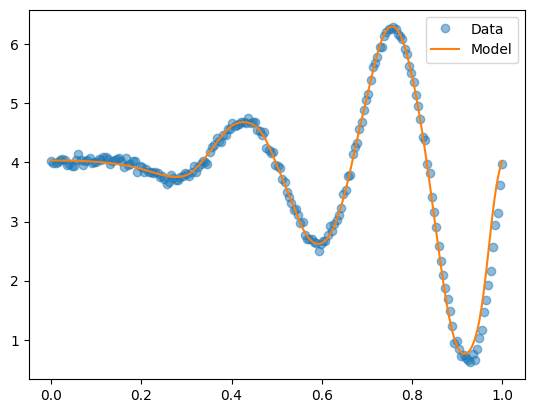

In [10]:
xs = np.linspace(0,1,300)
plt.plot(x, y, 'o', alpha=0.5, label='Data')
plt.plot(xs, model.predict(xs), label="Model")
plt.legend()
plt.show()

#### Extrapolation

Model looked quite good, so let's see if it can be used for making predictions for x values > 1. The answer is no - it is not capturing the function used for creating the data.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


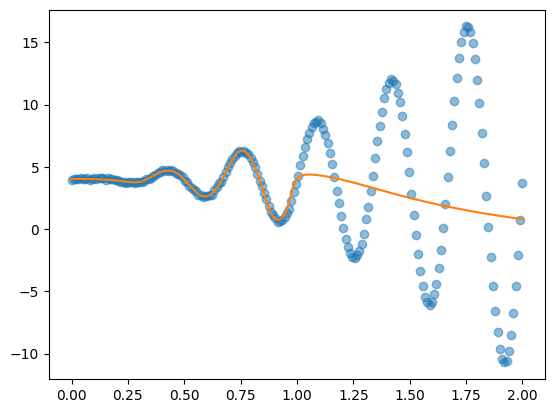

In [11]:
# Create data set

N = 200
x = np.linspace(0,2,N)
y = 4 + 4 * x * x * np.sin(6 * 3.14 * x) + np.random.normal(0,0.05,N)

xs = np.linspace(0,2,300)
plt.plot(x, y, 'o', alpha=0.5, label='Data')
plt.plot(xs, model.predict(xs), label="Model")
plt.show()

## Simple network for Boston housing dataset

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

print("x_train, y_train shapes:")
print(x_train.shape, y_train.shape)
print("x_test, y_test shapes:")
print(x_test.shape, y_test.shape)

print("Training sample 78:")
print(x_train[78])
print(y_train[78])

mean = np.mean(x_train, axis=0)
print("Mean x_train values:")
print(mean)

std = np.std(x_train, axis=0)
print("Std x_train values:")
print(std)

x_train_stan = x_train - mean
x_train_stan = x_train_stan / std

x_test_stan = x_test / mean
x_test_stan = x_test_stan / std

print("Mean x_train values after standardisation:")
print(np.mean(x_train_stan, axis=0))
print("Std x_train values after standardisation:")
print(np.std(x_train_stan, axis=0))

# install package scikit-learn to run the next statements
# note: this is alternative way of doing standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

x_train_ss = scaler.transform(x_train)
x_test_ss = scaler.transform(x_test)

print("Mean x_train values after standardisation with StandardScaler:")
print(np.mean(x_train_ss, axis=0))
print("Std x_train values after standardisation with StandardScaler:")
print(np.std(x_train_ss, axis=0))

x_train, y_train shapes:
(404, 13) (404,)
x_test, y_test shapes:
(102, 13) (102,)
Training sample 78:
[1.7171e-01 2.5000e+01 5.1300e+00 0.0000e+00 4.5300e-01 5.9660e+00
 9.3400e+01 6.8185e+00 8.0000e+00 2.8400e+02 1.9700e+01 3.7808e+02
 1.4440e+01]
16.0
Mean x_train values:
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
Std x_train values:
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
Mean x_train values after standardisation:
[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15  6.41414864e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.98136337e-16  2.36686358e-14  5.95679996e-15
  6.13920356e-16]
Std x_train values after standardisation:
[1. 1. 

## Network model

In [13]:
model1 = keras.Sequential()
model1.add(keras.layers.Input(shape=(13,)))
model1.add(layers.Dense(1, activation='relu'))

model1.compile(loss='mse', optimizer='sgd')

## Training the model

In [14]:
n_epochs = 30
hist1 = model1.fit(x_train_ss, y_train, epochs=n_epochs, batch_size = 32, validation_data=(x_test_ss, y_test))

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 462.1988 - val_loss: 303.5053
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255.2721 - val_loss: 211.8577
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188.3357 - val_loss: 173.1537
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180.4661 - val_loss: 152.0216
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156.5976 - val_loss: 137.8550
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.8814 - val_loss: 128.4889
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.7853 - val_loss: 121.3011
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126.8789 - val_loss: 116.5855
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121.8977 - val_loss: 112.8408
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 92.8816 - val_loss: 110.6508
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 129.4988 - val_loss: 108.6061
Epoch 12/30
13/13 ━━━━━━━━━━━━

## Plotting training/validation loss

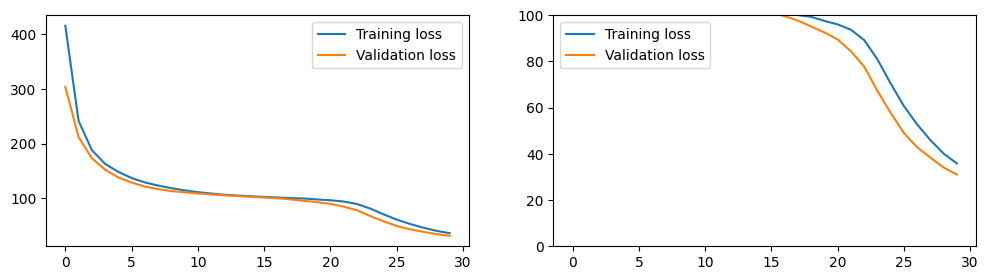

In [17]:
f = plt.figure(figsize=(12,3))

f1 = f.add_subplot(121)
f2 = f.add_subplot(122)

f1.plot(hist1.history['loss'], label="Training loss")
f1.plot(hist1.history['val_loss'], label="Validation loss")
f1.legend()

# make another plot with different scale
f2.set_ylim([0, 100])
f2.plot(hist1.history['loss'], label="Training loss")
f2.plot(hist1.history['val_loss'], label="Validation loss")
f2.legend()

plt.show()

## 3a Classification


In [18]:
# Helper function for 2D classification examples.

def plotGridPreds(x,y,model,scaler,N=100,plot_data=True):
    # create a grid for plotting decision values in 2D
    # first define axis
    x_scaled = scaler.transform(x)
    x1s = np.linspace(np.min(x_scaled[:,0])-1,np.max(x_scaled[:,0])+1,N)
    x2s = np.linspace(np.min(x_scaled[:,1])-1,np.max(x_scaled[:,1])+1,N)

    # create all combinations and stack them horizontally to get coordinate pairs
    xx1, xx2 = np.meshgrid(x1s,x2s)
    grid = np.hstack((xx1.reshape(-1,1), xx2.reshape(-1,1)))

    # make prediction for every grid point
    ps = np.rint(model.predict(grid))
    preds0 = scaler.inverse_transform(grid[np.flatnonzero(ps==0),:])
    preds1 = scaler.inverse_transform(grid[np.flatnonzero(ps==1),:])

    # plot grid points with prediction == 1 in blue, 0 in red
    plt.plot(preds1[:,0], preds1[:,1], 'bx', alpha=0.5)
    plt.plot(preds0[:,0], preds0[:,1], 'rx', alpha=0.5)

    if plot_data:
        # plot the data points
        plt.plot(x[y==1][:,0], x[y==1][:,1],'bo')
        plt.plot(x[y==0][:,0], x[y==0][:,1],'ro')
    plt.show()

### Two-dimensional binary classification

Create a simple (one-neuron) classification model. Here we have two-dimensional input, so input_shape=(2,). The purpose is to predict binary values so the activation function is sigmoid (which squashes its input to range 0..1 range). To make decisions, the predicted probability is rounded to 0 or 1 (np.rint(model.predict(grid)) in plotGridPreds() function). For a binary classification problem the loss parameter of compile() method is 'binary_crossentropy' and accuracy is used as metric.

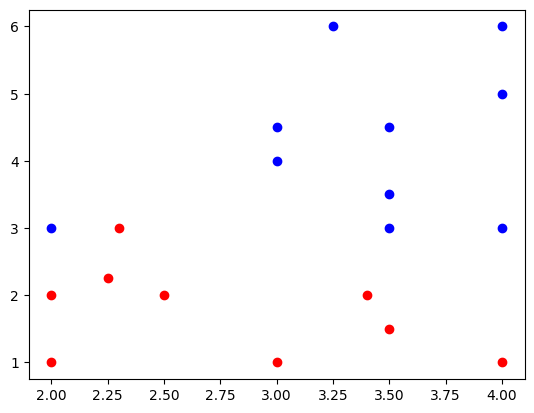

In [19]:
# Create blue and red data points for binary classification.

x = np.array([[2.3,3],[3.4,2],[2.25,2.25],[3.25,6],[2.5,2],[2,1],[2,2],[2,3],[3,1],[3,4.5],[3,4],[4,1],[4,3],[3.5,3.5],[4,5],[3.5,4.5],[4,6],[3.5,3],[3.5,1.5]])
y = np.array([0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0])

plt.plot(x[y == 0][:,0], x[y == 0][:,1], 'ro') # x[y == 0] picks from x rows in which values in y are == 0
plt.plot(x[y == 1][:,0], x[y == 1][:,1], 'bo')
plt.show()

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


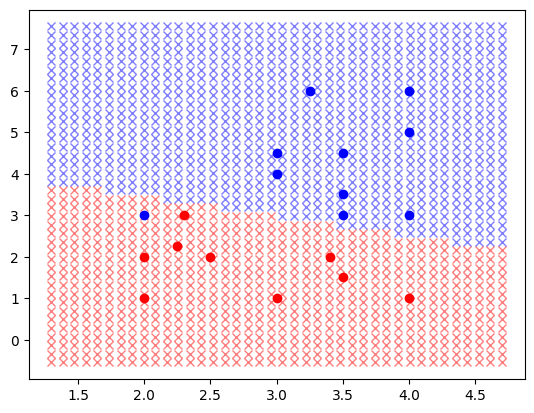

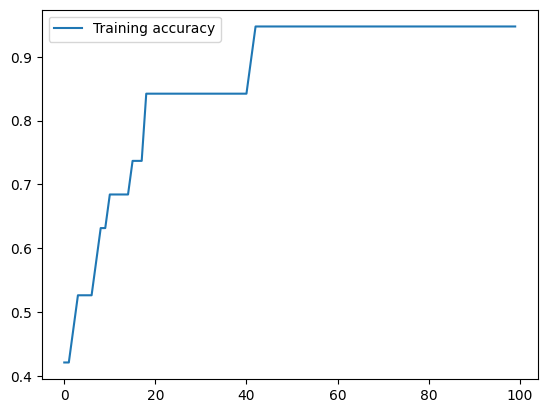

In [20]:
hist = model.fit(scaled_x, y, epochs=100, batch_size=4, verbose=0)

plotGridPreds(x,y,model,scaler,40)

plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.legend()
plt.show()

### Finding a more complicated decision surface

If a more complex model is used, the decision surface fit can be improved. The question, of course, is whether the more complicated model only overfits to data. It probably does, but here we are not verifying that guess with cross-validation.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 500)                 │          50,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 552,301 (2.11 MB)

 Trainable params: 552,301 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


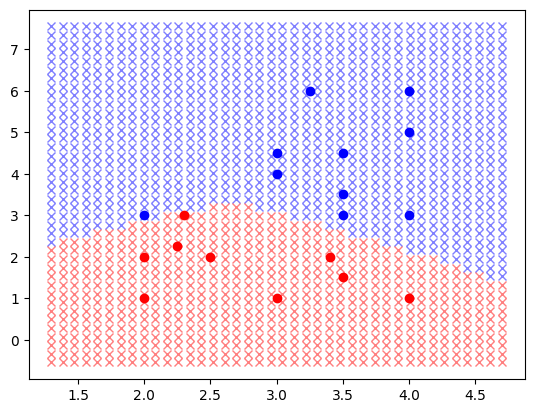

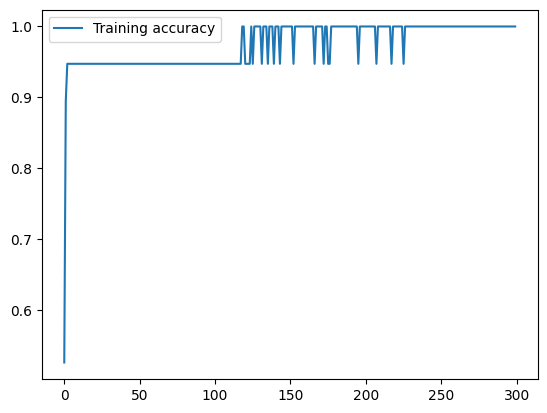

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(500, activation='tanh'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(500, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

hist = model.fit(scaled_x, y, epochs=300, batch_size=4, verbose=0)

plotGridPreds(x,y,model,scaler,40)

plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.legend()
plt.show()

#### One more example on non-linear decision surface

Here the example earlier used with kernel methods is solved with neural network. Data is generated in the same way as previously (in session2examples). In this example cross-validation is used.

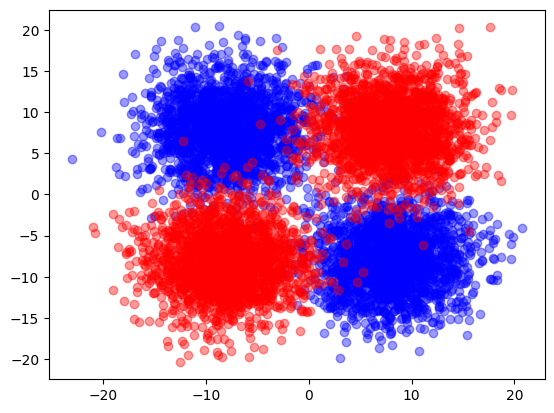

In [22]:
# Create data: 2D normal distributed set of points in each quadrant
# covariance matrix S determines the shape of data points (here symmetric)

N = 2000
# center points
x1c = 8
x2c = 8

S = np.array([[14,0],[0,14]])
nw = np.random.multivariate_normal(np.array([-x1c,x2c]),S,N)
ne = np.random.multivariate_normal(np.array([x1c,x2c]),S,N)
se = np.random.multivariate_normal(np.array([x1c,-x2c]),S,N)
sw = np.random.multivariate_normal(np.array([-x1c,-x2c]),S,N)
x = np.concatenate([nw,ne,se,sw])
y = np.concatenate([np.ones(nw.shape[0]),np.zeros(ne.shape[0]),np.ones(se.shape[0]),np.zeros(sw.shape[0])])

plt.plot(x[y==1][:,0], x[y==1][:,1],'bo', alpha=0.4)
plt.plot(x[y==0][:,0], x[y==0][:,1],'ro', alpha=0.4)
plt.show()

Model is complicated enough to have capability to find the decision surface. In this example fit() method parameter validation_split is used: it indicates the portion of data to be used for validation. Note that data needs to be shuffled before if this is used.

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


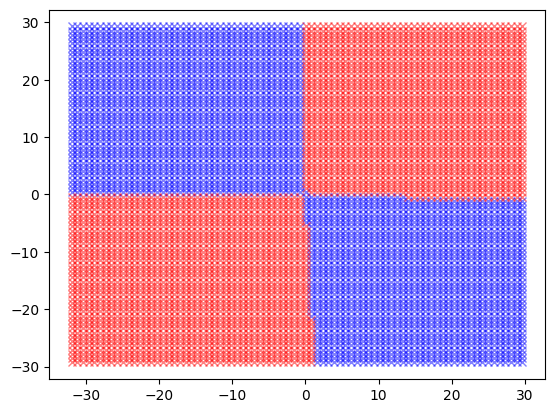

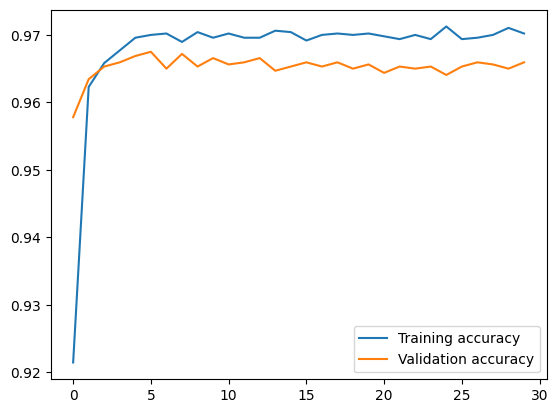

In [23]:
x, y = shuffle(x, y) # must shuffle since validation_split in Keras fit() does not shuffle

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(200, activation='tanh'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(scaled_x, y, epochs=30, batch_size=32, validation_split=0.4, verbose=0)
plotGridPreds(x,y,model,scaler,80, plot_data=False)

plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

## 4a Multinomial classification example

Here MNIST data set is used - it has images of handwritten digits and labels for those. There are 10 different labels (from 0 to 9), so the problem is multinomial and we use:
* cost function 'categorical_crossentropy'
* last layer activation function 'softmax'

To be able to compare the output from softmax (which contains a probability for each of the labels), the label data is converted into one-hot representation with keras.utils.to_categorical().

In [24]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28 * 28,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
hist = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.6234 - loss: 1.4145 - val_acc: 0.8573 - val_loss: 0.6168
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8584 - loss: 0.5937 - val_acc: 0.8800 - val_loss: 0.4844
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8740 - loss: 0.4923 - val_acc: 0.8887 - val_loss: 0.4319
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8797 - loss: 0.4527 - val_acc: 0.8933 - val_loss: 0.4026
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8869 - loss: 0.4199 - val_acc: 0.8984 - val_loss: 0.3827
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8936 - loss: 0.3981 - val_acc: 0.9006 - val_loss: 0.3688
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8967 - loss: 0.3806 - val_acc: 0.9031 - val_loss: 0.3580
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9003 - loss: 0.3669 - val_acc: 0.9056 - val_loss: 0.3494
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

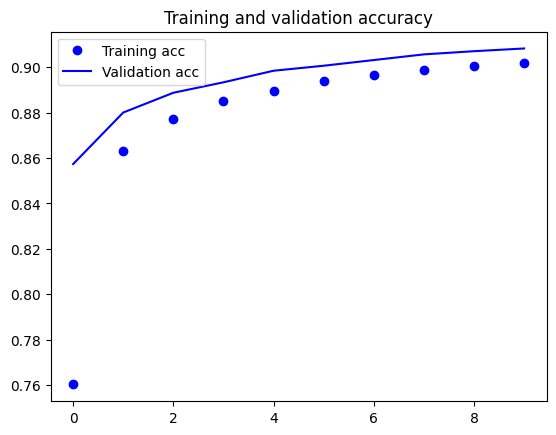

In [27]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(acc, 'bo', label='Training acc')
plt.plot(val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

#### More complicated model for MNIST classification

The complexity of the model is increased following the same ideas as before: increase number of layers / number of neurons per layer. Here also dropout layers are used - hoping to reduce overfit.

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28 * 28,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,010 (54.73 KB)

 Trainable params: 14,010 (54.73 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train_cat, epochs=40, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.2325 - loss: 2.1455 - val_acc: 0.7129 - val_loss: 0.9424
Epoch 2/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6639 - loss: 0.9947 - val_acc: 0.8340 - val_loss: 0.5456
Epoch 3/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.7917 - loss: 0.6686 - val_acc: 0.8692 - val_loss: 0.4269
Epoch 4/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8324 - loss: 0.5496 - val_acc: 0.8860 - val_loss: 0.3817
Epoch 5/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8567 - loss: 0.4820 - val_acc: 0.8989 - val_loss: 0.3419
Epoch 6/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8688 - loss: 0.4407 - val_acc: 0.9058 - val_loss: 0.3175
Epoch 7/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8781 - loss: 0.4151 - val_acc: 0.9116 - val_loss: 0.3003
Epoch 8/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8884 - loss: 0.3816 - val_acc: 0.9164 - val_loss: 0.2842
Epoch 9/40
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

Let's take a look at the confusion matrix. When model.predict() is called, it will return a vector of 10 probabilities, one for each possible outcome. We want to find which label has the highest probability and use np.argmax for that. np.argmax returns the index of the highest value in an array, for example:

In [30]:
a = np.array([4,7,2,1,2])
print(np.argmax(a)) # returns 1 because that is the index of the largest value (7)

1


In [31]:
from sklearn.metrics import confusion_matrix

print("Training set confusion matrix")
print(confusion_matrix(np.argmax(model.predict(x_train),axis=1), y_train)) # axis=0 is rows, 1 columns (the probabilities)
print("Validation set confusion matrix")
print(confusion_matrix(np.argmax(model.predict(x_val),axis=1), y_val))

Training set confusion matrix
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[5807    2   55   10   16   49   40    8   18   38]
 [   0 6590   20    8   11    8    7   14   82    8]
 [  18   44 5633   86   13   10   26   35   26    3]
 [   3   10   40 5692    0   78    1   13   51   51]
 [  10    9   37    2 5562   24   40   35   21  121]
 [  16   15   11  158    9 5080   58    3   71   35]
 [  22    5   53    6   47   65 5733    1   30    0]
 [   7   11   49   64   10    8    0 6057   10  103]
 [  34   40   55   73    7   67   13   10 5492   39]
 [   6   16    5   32  167   32    0   89   50 5551]]
Validation set confusion matrix
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 965    0   12    4    3   16    9    2    4    5]
 [   1 1115    3    0    2    1    2    4    8    7]
 [   2    4  968   16    3    1    6   15    4    1]
 [   1    3    6  947    0   23    0    5   14   13]
 [   0    0    6    0  926    3    9    3    8   32]
 [   4    2    1   22    0  815   13    0   17    8]
 [   